# Exploratory Data Analysis (EDA) – Fraud Detection

This notebook analyzes a dataset of 1 million bank transactions from a Zurich-based international bank. The purpose is to examine transaction behaviors, identify unusual patterns, and highlight trends that may indicate **fraudulent activity**.

## Objectives:
- Explore the **distribution** of key numeric features such as transaction amounts and account balances.
- Identify **rare or abnormal behaviors** that could be linked to fraud.
- Provide insights that will guide **feature engineering and selection** for later modeling stages.

The dataset contains transaction details including type, amount, origin and receiving account balances, and fraud indicators.

*Note: For clarity and performance, some visualizations use a sampled subset of the dataset (`.sample()`) while preserving fraudulent transactions.*



## Important Libraries & Load Data

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from IPython.display import display, Markdown

## Data Snapshot

Before creating visualizations, it's important to understand the **structure** and **basic stats** of the dataset.

Explore:
- The number of rows and columns
- Data types and null values
- Descriptive statistics of key features

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
print("Shape of transactions data:", transactions.shape)

Shape of transactions data: (1000000, 10)


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [5]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


## Data Check 

Before diving into visual analysis, quickly check for:

- Missing or null values
- Duplicates

In [6]:
# Check for missing/null values
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Check for duplicates 
print("Number of duplicate transactions:", transactions.duplicated().sum())
    

Number of duplicate transactions: 0


## Reflections: Guided Exploratory Analysis

This section, investigates a series of targeted analytical questions to better understand the transaction behaviors within the Caishen Bank dataset.

These questions are designed to surface insights related to value distributions, potential fraud patterns, and relationships between transaction attributes. Each question is supported by relevant visualizations, summaries, and business context to guide future feature engineering and predictive modeling efforts.

The following includes observations and interpretations tied to each question along with the visualisations.


### Q1

The five numeric features in the dataset are `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`. They were analyzed using histograms and boxplots. The histograms reveal the overall distribution and frequency of values, while the boxplots illustrate the central tendency, spread, and the influence of outliers. Together, these visualizations highlight how typical transactions differ from rare, high value cases.

This analysis was done to explore the following question, 

    How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.



#### Histogram Plots 

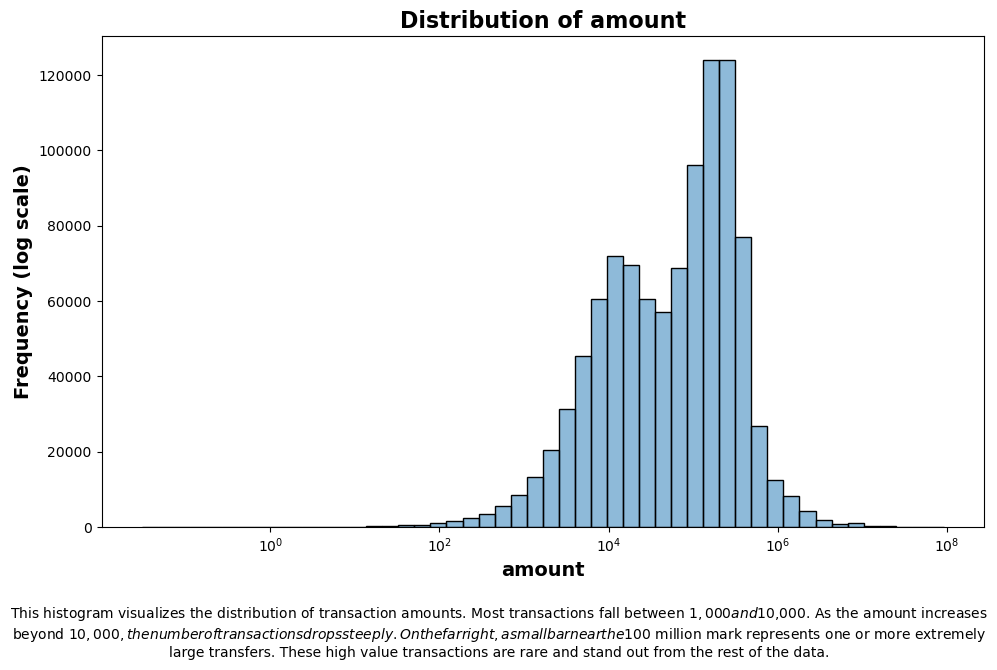

**Interpretation:** The distribution of amount is highly right skewed, meaning that most transaction values are concentrated on the lower end of the scale, while a smaller number of transactions reach very high values. From visual inspection, the majority of the transactions appear to fall between 1,000 and 10,000 on the x-axis, which corresponds to approximately $1,000 to $10,000. This range forms the peak of the histogram, indicating the mode of the data. As we move to the right along the x-axis, the frequency of transactions drops sharply, which shows a rapid decline in transaction volume as the amount increases. A few bars reach up to 100,000,000, or $100 million, which are considered outliers. These are values that are unusually large compared to the rest of the data and may either represent very high value business transfers or potentially fraudulent transactions. Since the y-axis is in log scale, it allows us to better visualize the frequency differences across such a wide range of values. This skewed distribution and the presence of extreme values suggest that measures like the median and interquartile range (IQR) may provide a more reliable summary of central tendency and spread than the mean, which could be heavily influenced by the outliers.

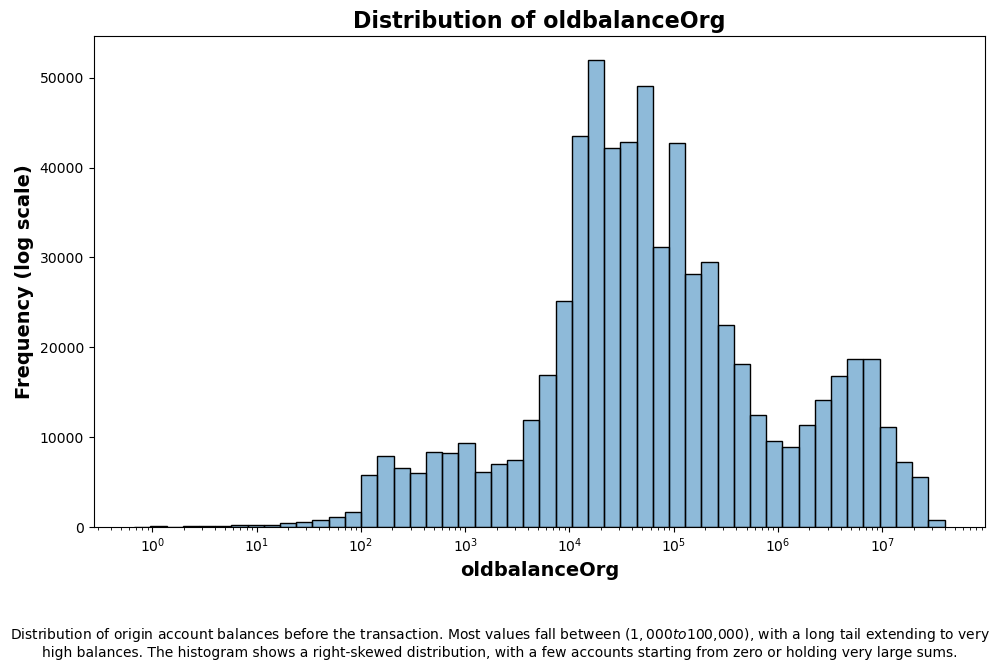

**Interpretation:** The oldbalanceOrg feature represents the balance of the sender`s  account prior to initiating a transaction. The distribution is right skewed, with a mode observed between approximately $10,000 and $100,000. This mode indicates the most frequently occurring range of balances before transactions. Although the majority of values are concentrated in the mid-to-high range, the distribution includes low frequency but high value observations extending beyond $10 million. These extreme values function as positive outliers and suggest the presence of accounts with unusually large balances, possibly representing institutional or high-net-worth users. The use of a logarithmic scale on the frequency axis enables better visualization of the wide range of values and reveals the presence of non-zero frequency across the entire domain of the variable. This indicates that transactions were made by users across a broad financial spectrum. Overall, the histogram highlights both the central tendency around mid-level balances and the long tail of rare, high value accounts, which may have implications for fraud detection or segmentation by account type.

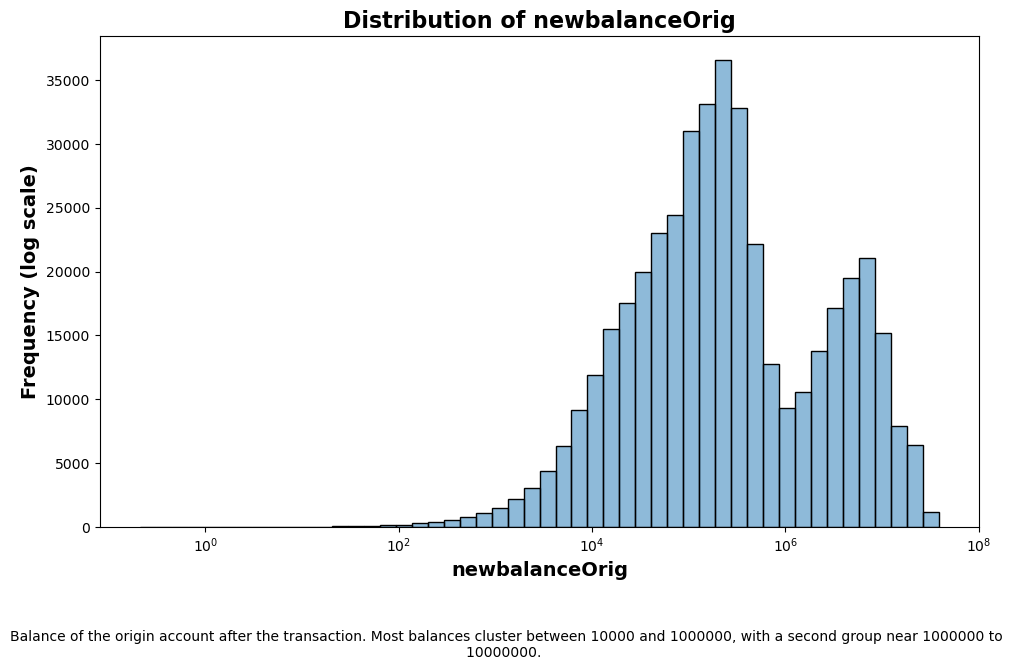

**Interpretation:** The newbalanceOrig feature shows a bimodal distribution, meaning there are two main peaks. The first peak occurs around 100,000, which represents the most common post transaction balance range. The second peak is found between 1,000,000 and 10,000,000, showinga separate group of accounts that retain very high balances after transferring funds. The presence of two peaks suggests that the datasetmay include two different types of users. The lower cluster may correspond to individuals or typical consumer accounts, while the higher cluster may represent businesses, institutional users, or high value clients. The distribution is right-skewed, with the frequency steadily decreasing for balances above 10,000,000. A few values near 100,000,000 represent extreme outliers, which stand apart from the rest of the data and may reflect unique or exceptional financial activity. Because this variable is skewed and contains outliers, the median and interquartile range (IQR) are more reliable measures of central tendency and spread than the mean, which would be heavily influenced by the highest balances.

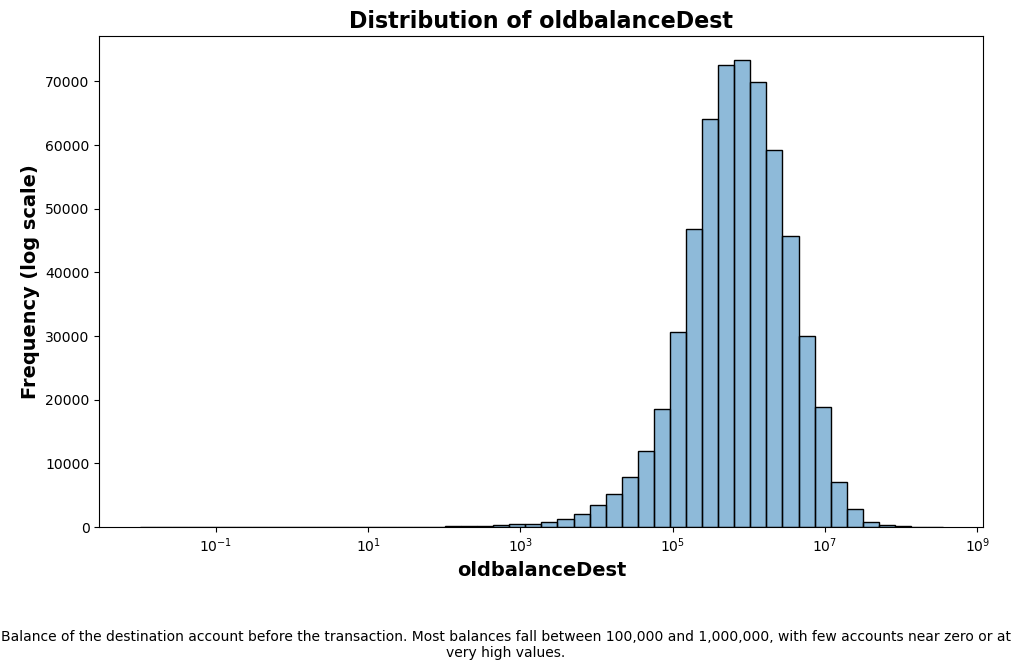

**Interpretation:** The oldbalanceDest feature shows a distribution with a single, clear peak centered between 100,000 and 1,000,000. This indicates that most receiving accounts hold moderate to high balances before money is transferred to them. There are relatively few accounts with balances near zero, suggesting that most receiving accounts are already active and not newly opened. The distribution is right skewed, with the frequency gradually declining for balances above 1,000,000. A small number of values reach close to 100,000,000, which represent extreme outliers compared to the rest of the data. These outliers may reflect large business accounts or rare transfers involving very high amounts of money. Because of the skewness and the presence of outliers, the median and interquartile range (IQR) are better suited than the mean for summarizing the central tendency and spread of this variable, as the mean would be heavily influenced by the largest values.

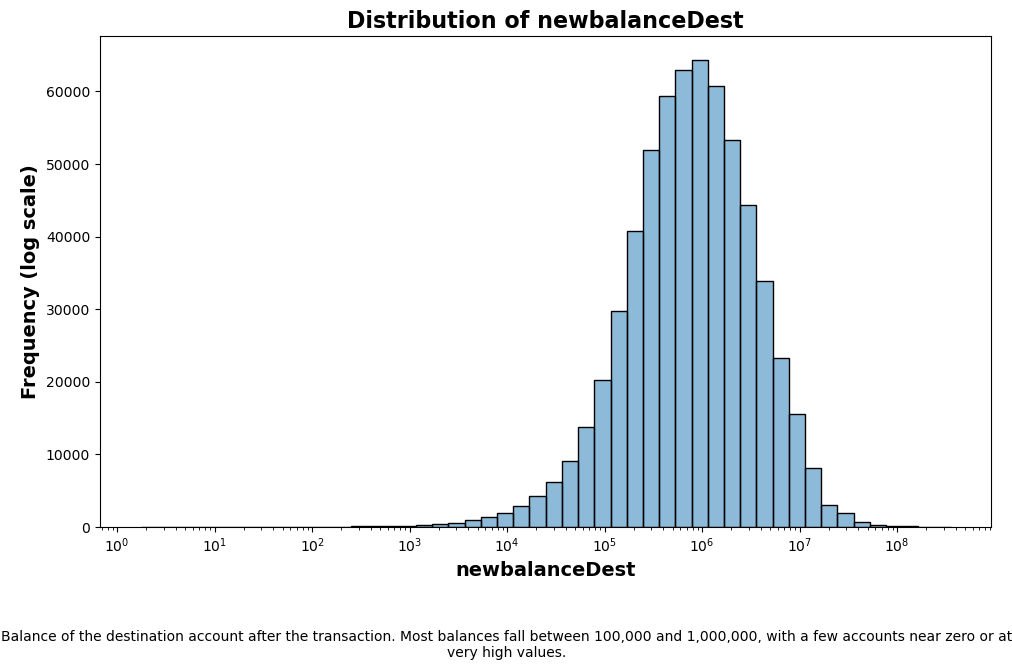

**Interpretation:** The newbalanceDest feature shows a distribution with a single peak centered between 100,000 and 1,000,000. This indicates that after receiving funds, most accounts maintain moderate to high balances. Very few accounts end with balances near zero, suggesting that most recipients already had funds before the transfer and were not newly opened or inactive accounts. The distribution is right-skewed, with the frequency declining steadily for balances above 1,000,000. A small number of values approach 100,000,000, which are extreme outliers compared to the rest of the dataset. These outliers may represent large business-related accounts or rare transfers involving unusually high sums. Because of the skewness and these outliers, the median and interquartile range (IQR) are more suitable for summarizing the central tendency and spread than the mean, which would be significantly affected by the largest balances.

In [23]:
# Define the transaction features and interpretations
transaction_feature = {
    'amount': {
        'description': 'This histogram visualizes the distribution of transaction amounts. Most transactions fall between $1,000 and $10,000. '
        'As the amount increases beyond $10,000, the number of transactions drops steeply. On the far right, a small bar near the $100 million '
        'mark represents one or more extremely large transfers. These high value transactions are rare and stand out from the rest of the '
        'data.',

        'interpretation': 'The distribution of amount is highly right skewed, meaning that most transaction values are concentrated on the lower '
        'end of the scale, while a smaller number of transactions reach very high values. From visual inspection, the majority of the transactions '
        'appear to fall between 1,000 and 10,000 on the x-axis, which corresponds to approximately $1,000 to $10,000. This range forms the peak of the '
        'histogram, indicating the mode of the data. As we move to the right along the x-axis, the frequency of transactions drops sharply, which '
        'shows a rapid decline in transaction volume as the amount increases. A few bars reach up to 100,000,000, or $100 million, which are considered '
        'outliers. These are values that are unusually large compared to the rest of the data and may either represent very high value business '
        'transfers or potentially fraudulent transactions. Since the y-axis is in log scale, it allows us to better visualize the frequency '
        'differences across such a wide range of values. This skewed distribution and the presence of extreme values suggest that measures like the '
        'median and interquartile range (IQR) may provide a more reliable summary of central tendency and spread than the mean, which could be '
        'heavily influenced by the outliers.' 
    },
    'oldbalanceOrg': {
        'description': 'Distribution of origin account balances before the transaction. Most values fall between ($1,000 to $100,000), with a long '
        'tail extending to very high balances. The histogram shows a right-skewed distribution, with a few accounts starting from zero or holding '
        'very large sums.',
        
        'interpretation': 'The oldbalanceOrg feature represents the balance of the sender`s  account prior to initiating a transaction. The '
        'distribution is right skewed, with a mode observed between approximately $10,000 and $100,000. This mode indicates the most frequently '
        'occurring range of balances before transactions. Although the majority of values are concentrated in the mid-to-high range, the '
        'distribution includes low frequency but high value observations extending beyond $10 million. These extreme values function as positive '
        'outliers and suggest the presence of accounts with unusually large balances, possibly representing institutional or high-net-worth users. '
        'The use of a logarithmic scale on the frequency axis enables better visualization of the wide range of values and reveals the presence of '
        'non-zero frequency across the entire domain of the variable. This indicates that transactions were made by users across a broad financial '
        'spectrum. Overall, the histogram highlights both the central tendency around mid-level balances and the long tail of rare, high value '
        'accounts, which may have implications for fraud detection or segmentation by account type.'
    },
    'newbalanceOrig': {
        'description': 'Balance of the origin account after the transaction. Most balances cluster between 10000 and 1000000, with a second group '
        'near 1000000 to 10000000. ',

        'interpretation': 'The newbalanceOrig feature shows a bimodal distribution, meaning there are two main peaks. The first peak occurs around '
        '100,000, which represents the most common post transaction balance range. The second peak is found between 1,000,000 and 10,000,000, showing'
        'a separate group of accounts that retain very high balances after transferring funds. The presence of two peaks suggests that the dataset'
        'may include two different types of users. The lower cluster may correspond to individuals or typical consumer accounts, while the higher '
        'cluster may represent businesses, institutional users, or high value clients. The distribution is right-skewed, with the frequency steadily '
        'decreasing for balances above 10,000,000. A few values near 100,000,000 represent extreme outliers, which stand apart from the rest of the '
        'data and may reflect unique or exceptional financial activity. Because this variable is skewed and contains outliers, the median and '
        'interquartile range (IQR) are more reliable measures of central tendency and spread than the mean, which would be heavily influenced by '
        'the highest balances.'
    },
    'oldbalanceDest': {
        'description': 'Balance of the destination account before the transaction. Most balances fall between 100,000 and 1,000,000, with few '
        'accounts near zero or at very high values.',

        'interpretation': 'The oldbalanceDest feature shows a distribution with a single, clear peak centered between 100,000 and 1,000,000. This '
        'indicates that most receiving accounts hold moderate to high balances before money is transferred to them. There are relatively few '
        'accounts with balances near zero, suggesting that most receiving accounts are already active and not newly opened. The distribution is '
        'right skewed, with the frequency gradually declining for balances above 1,000,000. A small number of values reach close to 100,000,000, '
        'which represent extreme outliers compared to the rest of the data. These outliers may reflect large business accounts or rare transfers '
        'involving very high amounts of money. Because of the skewness and the presence of outliers, the median and interquartile range (IQR) are '
        'better suited than the mean for summarizing the central tendency and spread of this variable, as the mean would be heavily influenced by '
        'the largest values.'
    },
    'newbalanceDest': {
        'description': 'Balance of the destination account after the transaction. Most balances fall between 100,000 and 1,000,000, with a few '
        'accounts near zero or at very high values.',
        
        'interpretation': 'The newbalanceDest feature shows a distribution with a single peak centered between 100,000 and 1,000,000. This '
        'indicates that after receiving funds, most accounts maintain moderate to high balances. Very few accounts end with balances near zero, '
        'suggesting that most recipients already had funds before the transfer and were not newly opened or inactive accounts. The distribution is '
        'right-skewed, with the frequency declining steadily for balances above 1,000,000. A small number of values approach 100,000,000, which are '
        'extreme outliers compared to the rest of the dataset. These outliers may represent large business-related accounts or rare transfers '
        'involving unusually high sums. Because of the skewness and these outliers, the median and interquartile range (IQR) are more suitable for '
        'summarizing the central tendency and spread than the mean, which would be significantly affected by the largest balances.'
    }
}

# Plotting the distribution of each column
for feature, content in transaction_feature.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(transactions[feature], bins=50, kde=True, log_scale=True)
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.ylabel('Frequency (log scale)', fontsize=14, fontweight='bold')
    plt.figtext(0.5, -0.1, content['description'], wrap=True, horizontalalignment='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    display(Markdown(f"**Interpretation:** {content['interpretation']}"))

The histogram analysis shows that all five numeric features: `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest` are heavily right skewed and contain extreme values that extend far beyond the typical transaction ranges. While the histograms reveal the overall distribution and frequency patterns, they do not provide a clear picture of the **median**, the **interquartile range (IQR)**, or the influence of these extreme outliers on measures of central tendency.

To better understand the spread and central tendency of these features, and to visualize the impact of outliers, **boxplots** are used next. By displaying the median and IQR, the boxplots make it clear why the **median** is a more reliable measure of center than the **mean**, which would be disproportionately pulled upward by the largest values in each feature.

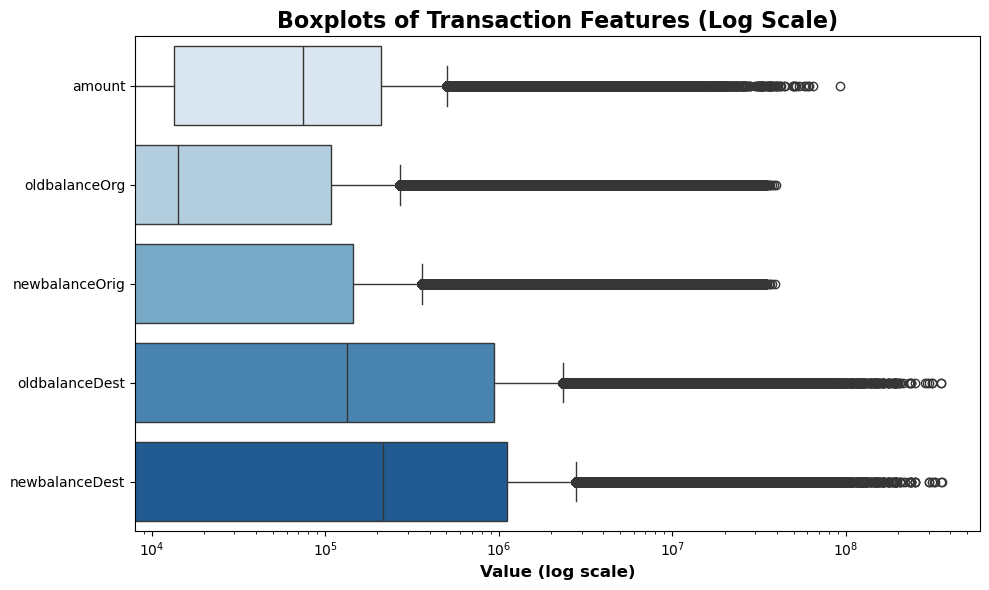

In [ ]:
# Combined boxplot for all five numeric features 
plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']], orient='h', palette='Blues')
plt.xscale('log')  # Log scale for skewness and outliers
plt.title('Boxplots of Transaction Features (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Value (log scale)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


**Interpretation:** The combined boxplot confirms that all five numeric features share a heavily skewed distribution with long tails extending toward higher values. Each feature shows a **median** (the central line inside each box) that is much closer to the lower end of its range, while the boxes themselves (the interquartile ranges) represent the middle 50 percent of the data. The whiskers and numerous dots extending to the right show the presence of many **extreme outliers**.

Among the five features, `oldbalanceDest` and `newbalanceDest` show the widest spreads, while `amount` shows the largest individual outliers. These extreme values, which can reach up to 100,000,000, demonstrate how the **mean** would be pulled upward and fail to represent a typical transaction or balance. For this reason, the **median** and **IQR** are more reliable measures of central tendency and spread for these variables, as they better reflect the typical ranges without being distorted by the most extreme values.


**Summary of Numeric Feature Distribution**

The histograms show that all five numeric features: `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest` are heavily right skewed, with most values concentrated between 10,000 and 1,000,000 and a long tail extending to 100,000,000. These distributions indicate that while typical transactions and balances fall into predictable ranges, there are consistent outliers that represent unusually large amounts. The combined boxplot further illustrates this skewness by showing how the data spreads around the median, with many individual outlier points extending far beyond the central range. Together, these visuals highlight that the data spans a wide scale, with common values grouped tightly at the lower end and rare extreme cases stretching far to the right.



**Answer**

Most transactions and balances cluster within moderate ranges, but the presence of extreme outliers creates noticeable skewness. Because these outliers distort the mean, it does not accurately represent a “typical” value. In statistics, the “central tendency” describes where the center of the data lies, and for skewed datasets like this one, the median and interquartile range (IQR) provide a clearer picture of that center than the mean. The majority of the data reflects normal financial behavior, while the rare, high value cases stand apart and may warrant closer analysis as potential large scale transfers or fraudulent activity.


### Q2

The first analysis showed that while most transactions and account balances fall within predictable ranges, rare outliers stand apart and may represent unusual or suspicious activity. To investigate further, this question examines how fraudulent and non-fraudulent transactions compare when looking at pairs of numeric features. By using scatterplots, patterns or clusters can be identified that reveal whether fraudulent transactions tend to occur within specific ranges or relationships between variables.

    Question: When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.



#### Identifying Which Feature Pairs Are Worth Exploring

The correlation heatmap provides a quick visual overview of how the numeric features relate to one another. However, to decide which pairs are actually worth plotting in detail, the correlation values can be programmatically ranked and filtered.

The `.unstack()` method is used to transform the square correlation matrix into a long list of feature pairs with their correlation scores. This makes it possible to sort and filter the results. Duplicate pairs (such as `amount` vs. `oldbalanceDest` and `oldbalanceDest` vs. `amount`) and self-correlations (a feature compared to itself, which is always 1.0) are removed to keep the output clean.

Only pairs with correlations above 0.25 are kept. This threshold captures relationships that are strong enough to suggest meaningful patterns but avoids nearly perfect correlations (close to 1.0) that are mathematically redundant, such as pre- and post-balance fields which differ only by the transaction amount.

By ranking and filtering the pairs in this way, we can focus on the feature combinations most likely to reveal patterns when comparing fraudulent and non-fraudulent transactions in scatterplots.


**Heatmaps**

Show the correlation values between features, it does not directly fraud-related but can show which pairs are worth plotting in scatterplots.

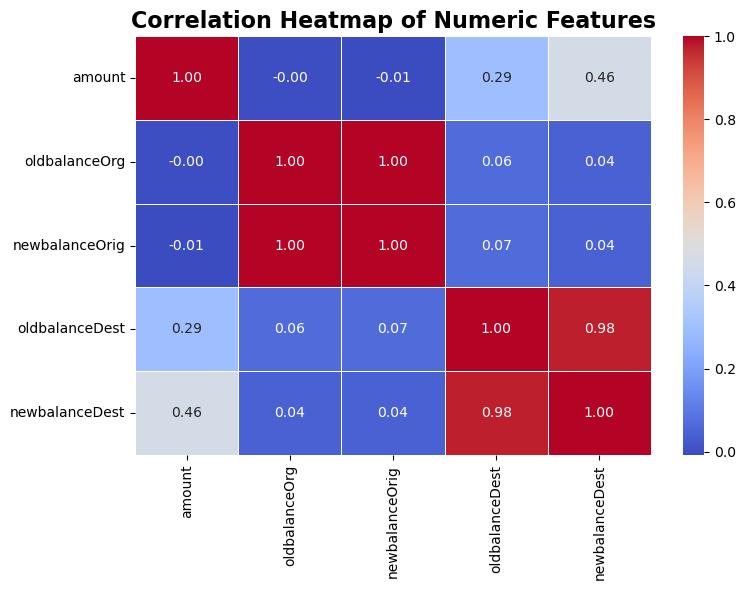

Feature pairs with correlation >= 0.25 (ranked):
newbalanceOrig  oldbalanceOrg     0.998878
oldbalanceOrg   newbalanceOrig    0.998878
newbalanceDest  oldbalanceDest    0.975278
oldbalanceDest  newbalanceDest    0.975278
newbalanceDest  amount            0.460420
amount          newbalanceDest    0.460420
                oldbalanceDest    0.293605
oldbalanceDest  amount            0.293605
dtype: float64


In [10]:
# Select only numeric columns to examine relationships between transaction values and balances
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Compute the correlation matrix (this measures the strength and direction of relationships between features)
corr_matrix = transactions[numeric_cols].corr()

# Visualize as a heatmap for a quick overview
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Turn the correlation matrix into a ranked list using unstack()

# .unstack() converts the square correlation matrix into a long Series of pairs:
# This makes it easier to filter and sort correlations.
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove duplicates and self-correlations
# The correlation matrix is symmetrical (A vs. B is the same as B vs. A),
# so without filtering, every pair would appear twice.
# We also remove self-correlations (like amount vs. amount) which are always 1.0.
corr_pairs = corr_pairs[
    corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)
]

# Only care about correlations strong enough to suggest a relationship
# but not so perfect that they are redundant. A typical threshold is 0.25,
# meaning we focus on moderate to strong correlations (positive or negative).
# Very low correlations (< 0.25) likely won't reveal meaningful patterns,
# and very high ones (close to 1) are often just mathematical duplicates
# (like pre- and post-balance, which differ only by the transaction amount).
threshold = 0.25
interesting_pairs = corr_pairs[abs(corr_pairs) >= threshold]

# Display the resulting list of feature pairs worth exploring
print("Feature pairs with correlation >= 0.25 (ranked):")
print(interesting_pairs)


#### Preparing Scatterplots to Compare Fraudulent and Non-Fraudulent Transactions

Scatterplots will be used to explore the most relevant feature pairs identified by the correlation analysis. Based on the ranked correlations, the following relationships will be plotted:

1. `amount` versus `oldbalanceDest`  
2. `amount` versus `newbalanceDest`  
3. `oldbalanceDest` versus `newbalanceDest` 

These plots will help determine whether fraudulent transactions form noticeable clusters or occur in specific value ranges compared to non-fraudulent transactions.

Since the dataset contains a large number of transactions, plotting every point would create overly dense visuals where patterns become difficult to distinguish. To make the plots clear and interpretable, a random sample of transactions will be used. All fraudulent transactions will be included to ensure they are represented, while a subset of non-fraudulent transactions will be sampled to balance the data.

Fraudulent and non-fraudulent transactions will be color-coded so any patterns, clusters, or anomalies related to fraud are easy to identify visually. This approach will make it possible to highlight how fraudulent activity compares to typical transactions within the most meaningful feature combinations.


**Scatterplots** 

Show the relationship between two variables

In [11]:
# Get all fraud cases (so none are left out)
fraud_df = transactions[transactions['isFraud'] == 1]

# Take a random sample of non-fraud cases (don’t plot the full dataset)
# Subtract the fraud count so the total sample is about 5,000 rows
nonfraud_sample_size = 5000 - len(fraud_df)
nonfraud_df = transactions[transactions['isFraud'] == 0].sample(
    n=nonfraud_sample_size,
    random_state=42  # Makes results the same every time
)

# Combine fraud and non-fraud samples into one dataset
sampled_df = pd.concat([fraud_df, nonfraud_df])

# Check the counts
print("Total rows in sample:", len(sampled_df))
print("Fraud cases in sample:", len(fraud_df))
print("Non-fraud cases in sample:", len(nonfraud_df))


Total rows in sample: 5000
Fraud cases in sample: 1297
Non-fraud cases in sample: 3703


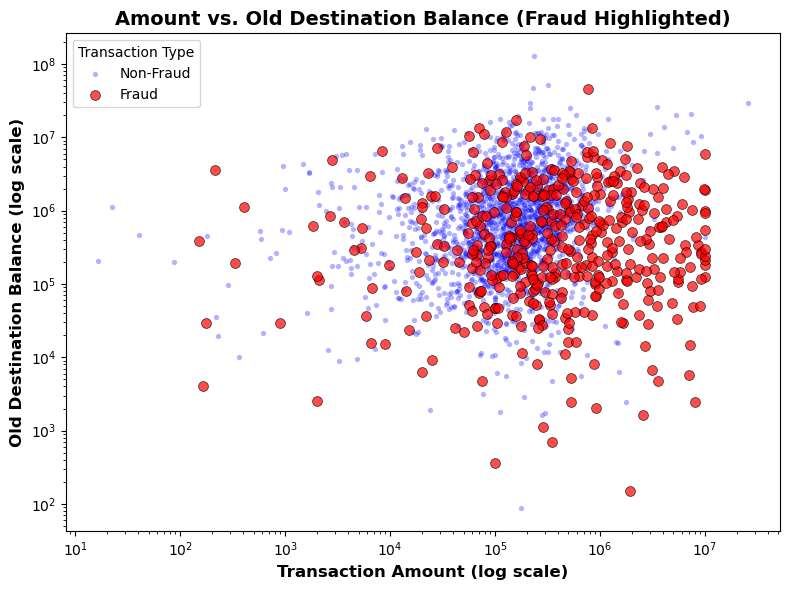

In [12]:
#  Plot `amount` versus `oldbalanceDest`  

plt.figure(figsize=(8, 6))

# Plot non-fraud points (blue, smaller, more transparent)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 0],
    x='amount',
    y='oldbalanceDest',
    color='blue',
    alpha=0.3,
    s=15,   # smaller size
    label='Non-Fraud'
)

# Plot fraud points (red, larger, outlined)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 1],
    x='amount',
    y='oldbalanceDest',
    facecolor='red',
    edgecolor='black',  # outline to make fraud stand out
    alpha=0.7,
    s=50,   # larger size
    label='Fraud'
)

# Log scale to handle skewed values
plt.xscale('log')
plt.yscale('log')

# Titles and labels
plt.title('Amount vs. Old Destination Balance (Fraud Highlighted)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Amount (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('Old Destination Balance (log scale)', fontsize=12, fontweight='bold')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


**Interpretation:** This scatterplot compares transaction amounts to the receiving account balances before the transaction, using a log scale to accommodate the wide range of values. Fraudulent transactions (red) and non-fraudulent transactions (blue) show distinct patterns:

- Most non-fraudulent transactions cluster between roughly 10,000 and 1,000,000 for both amount and balance, forming a dense central region.
- Fraudulent transactions are more dispersed, frequently appearing at the upper edges of both axes, including amounts and balances exceeding 1,000,000.
- The log scale reveals that fraudulent activity often occurs in sparser regions, outside the central cluster where most legitimate activity resides.

Because of this separation, fraudulent transactions tend to form looser, more scattered distributions, while typical transactions are concentrated around moderate values. These observations suggest that extreme transaction sizes and balances could be useful indicators when identifying potential fraud, though overlap with legitimate outliers means further modeling will be needed.


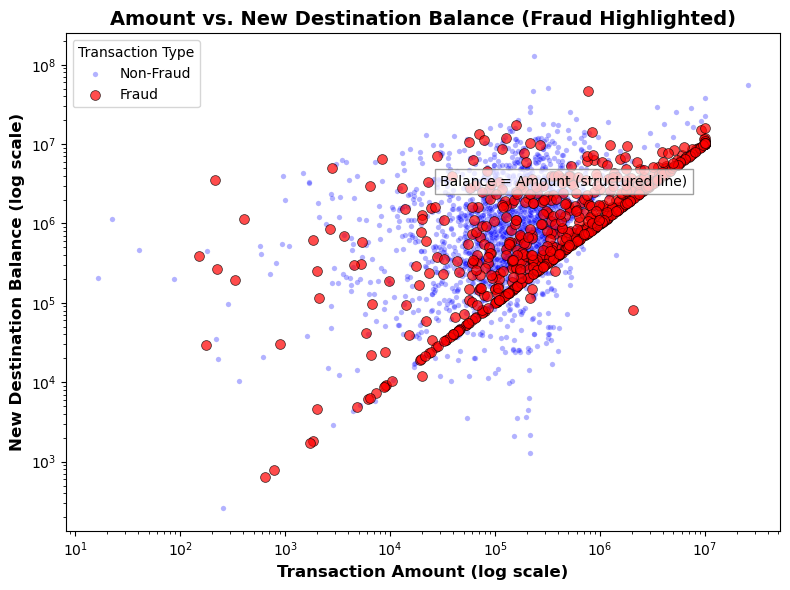

In [26]:
# Plot `amount` versus `newbalanceDest`  

plt.figure(figsize=(8, 6))

# Plot non-fraud points (blue, smaller, more transparent)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 0],
    x='amount',
    y='newbalanceDest',
    color='blue',
    alpha=0.3,
    s=15,  # smaller point size
    label='Non-Fraud'
)

# Plot fraud points (red, larger, outlined)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 1],
    x='amount',
    y='newbalanceDest',
    facecolor='red',
    edgecolor='black',  # outline for visibility
    alpha=0.7,
    s=50,  # larger point size
    label='Fraud'
)

# Log scales to handle skewness
plt.xscale('log')
plt.yscale('log')

# Annotate the diagonal line
# 3e are many transactions where the new balance equals the amount, indicating structured transfers
# 3e4 and 3e6 are chosen to place the text in a visible area
plt.text(3e4, 3e6, "Balance = Amount (structured line)", fontsize=10, color='black', 
         bbox=dict(facecolor='white', alpha=.75, edgecolor='gray'))

# Titles and labels
plt.title('Amount vs. New Destination Balance (Fraud Highlighted)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Amount (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('New Destination Balance (log scale)', fontsize=12, fontweight='bold')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


**Interpretation:** This scatterplot compares transaction amounts to the receiving account balances after the transaction, using a log scale to manage the wide value ranges. Fraudulent transactions (red) and non-fraudulent transactions (blue) show distinct behaviors:

- Most non-fraudulent transactions cluster between 10,000 and 1,000,000 on both axes, while fraudulent transactions are more spread out, with many appearing at higher balances and amounts.
- A clear diagonal line appears, where the new balance is nearly equal to the transaction amount. This pattern reflects system-driven updates, where the receiving account balance matches the incoming transfer amount exactly, suggesting structured or automated transactions.
- Fraudulent activity is more prominent along and above this line, indicating that large, structured deposits may be associated with higher fraud risk.

The diagonal line indicates that many transactions update the receiving account balance by exactly the deposited amount, as if the account balance was zero before the transfer. This structured pattern is different from typical activity, where balances usually vary. Such consistent balance changes can signal automated transfers, which may be part of legitimate operations but can also point to fraud, such as money being funneled into empty accounts for quick withdrawal.

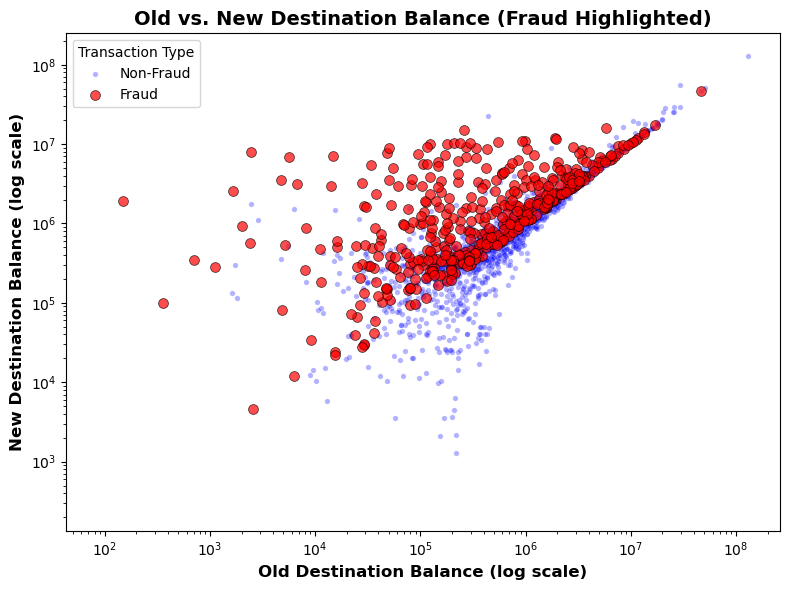

In [14]:
# Plot `oldbalanceDest` versus `newbalanceDest` 

plt.figure(figsize=(8, 6))

# Non-fraud points (blue, smaller, transparent)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 0],
    x='oldbalanceDest',
    y='newbalanceDest',
    color='blue',
    alpha=0.3,
    s=15,
    label='Non-Fraud'
)

# Fraud points (red, larger, outlined)
sns.scatterplot(
    data=sampled_df[sampled_df['isFraud'] == 1],
    x='oldbalanceDest',
    y='newbalanceDest',
    facecolor='red',
    edgecolor='black',
    alpha=0.7,
    s=50,
    label='Fraud'
)

# Log scale for wide ranges
plt.xscale('log')
plt.yscale('log')

# Titles and labels
plt.title('Old vs. New Destination Balance (Fraud Highlighted)', fontsize=14, fontweight='bold')
plt.xlabel('Old Destination Balance (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('New Destination Balance (log scale)', fontsize=12, fontweight='bold')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


**Interpretation:** This scatterplot compares the receiving account’s balance before and after each transaction, with a log scale to handle the wide range of values. Fraudulent transactions (red) and non-fraudulent transactions (blue) show distinct distributions:

- Most non-fraudulent transactions cluster tightly along a diagonal, where the new balance is roughly equal to the old balance plus the transaction amount. This pattern reflects typical account behavior, where funds are added to existing balances.
- Fraudulent transactions are more dispersed, appearing both along the diagonal and above it, where the new balance increases disproportionately compared to the old balance. This dispersion suggests irregular account activity, such as sudden large deposits into accounts that had little prior activity.
- The diagonal pattern itself is expected because balances normally update predictably when funds arrive, but the broader spread of fraud cases away from this line indicates that extreme or disproportionate balance changes may be a sign of fraudulent behavior.

Overall, while legitimate transactions typically follow a stable balance update pattern, fraudulent activity tends to appear more scattered and outside the dense cluster, highlighting unusual balance changes that can be used as indicators during fraud detection.


**Summary of Fraud Patterns Across Scatterplots**

Across the three scatterplots:
1. `amount` vs. `oldbalanceDest`
2. `amount` vs. `newbalanceDest`
3. `oldbalanceDest` vs. `newbalanceDest`
several consistent patterns emerge that help distinguish fraudulent transactions from typical activity:

1. **Fraudulent transactions often occur in regions of extreme values.**  
   Fraud cases frequently involve transaction amounts and account balances exceeding 1,000,000, appearing at the edges of the distributions where legitimate transactions are less common.

2. **Structured balance patterns reveal additional separation.**  
   Along the diagonal trends fraudulent transactions tend to be **above the line**, indicating disproportionately large balance jumps compared to typical transactions.

3. **Both fraud and non-fraud transactions share the same overall trends, but scale matters.**  
   While both groups follow the expected diagonal relationships, fraudulent cases consistently occupy sparser, higher value regions, where sharp balance increases are more frequent.

These observations suggest that **both transaction size and the magnitude of balance changes** can serve as important indicators when identifying suspicious activity, beyond simply tracking whether balances behave predictably.


**Answer**

Fraudulent transactions stand out when comparing pairs of numeric features. They often involve very large transaction amounts and account balances, showing up in parts of the charts where most regular transactions don’t appear. Even when balances update as expected with the new balance matching the old balance plus the transfer, fraud cases often sit above the main group, where balances jump by bigger amounts than usual.

In otherwords, fraud tends to happen with bigger amounts and larger balance changes, especially in areas where normal transactions are less common. These patterns can help point out suspicious activity.

The previous analysis focused on how numeric features, such as transaction amounts and account balances, interact and reveal patterns that can help separate fraudulent from non-fraudulent transactions. Next, the focus shifts from numeric relationships to **categorical factors** specifically, the types of transactions. By examining how transaction amounts vary across different transaction types, we can identify whether certain types tend to involve larger or smaller amounts on average. Understanding these differences can help highlight which transaction categories carry higher-value activity and may warrant closer attention in fraud detection.


### Q3
Different types of transactions such as transfers, cash-outs, and payments, can involve very different typical amounts. Understanding how amounts vary by transaction type can help identify which categories carry higher value or lower value activity, which may be useful for risk assessment and fraud detection.

To explore this, the dataset will be grouped by transaction type, and key statistics such as median and range will be calculated. Because transaction amounts vary widely and include extreme outliers, visualizations like boxplots with a log scale will be used to make comparisons clearer and highlight which types consistently involve larger or smaller transactions.

This exploration is done to answer the question,

    How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

In [15]:
# Group by transaction type and calculate statistics for amount
transaction_type_stats = transactions.groupby('type')['amount'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).sort_values(by='median', ascending=False)

# Display the statistics table
transaction_type_stats

,count,mean,median,min,max,std
type,,,,,,
TRANSFER,83695,911827.155179,487883.710,2.60,92445516.64,1.896175e+06
CASH_OUT,351360,175584.659320,146209.915,0.00,10000000.00,1.703743e+05
CASH_IN,219955,168928.914668,142942.990,0.43,1609288.13,1.267864e+05
PAYMENT,338573,13055.592085,9481.670,0.03,230549.18,1.256291e+04
DEBIT,6417,5445.890813,3099.530,5.24,389762.68,1.302416e+04


**Interpreptation:** The table shows how transaction amounts differ by transaction type, including the count of transactions, mean, median, minimum, maximum, and standard deviation. The table is sorted by **median transaction amount** because the median is less affected by extreme outliers than the mean and better represents the *"typical"* transaction size within each category.

- **`TRANSFER` transactions** involve the largest amounts, with a median of about 487,884 and a mean close to 911,827. The mean is almost twice the median, and the standard deviation is nearly 1.9 million, showing extreme variability driven by very large outliers (some nearing 92 million).
- **`CASH_OUT` and `CASH_IN`** also involve high-value transactions, with medians around 142,943 to 146,210 and standard deviations over 125,000, though their maximum values are much lower than transfers.
- **`PAYMENT` transactions** typically involve much smaller amounts, with a median of 9,482 and a relatively low standard deviation of about 12,563, despite a few larger payments (up to ~230,549).
- **`DEBIT` transactions** are the smallest category, with a median of 3,100 and a mean of 5,446, but with a standard deviation (13,024) nearly four times the median due to a few large debits.

The gaps between the means and medians, especially for `TRANSFER`, highlight the effect of extreme outliers pulling averages upward. Sorting by median shows more clearly which transaction types **"typically"** involve the largest and smallest amounts, without being misled by rare, high value outliers.


While the summary table highlights the average, median, and range of amounts by transaction type, it does not show how the amounts are distributed within each category. A boxplot provides a clearer picture by visualizing the spread, central tendency, and variability for each type. 

Because transaction amounts are highly skewed and include extreme outliers, a log scale will be used to make the differences between transaction types more readable.

**Boxplot Transaction Amount**

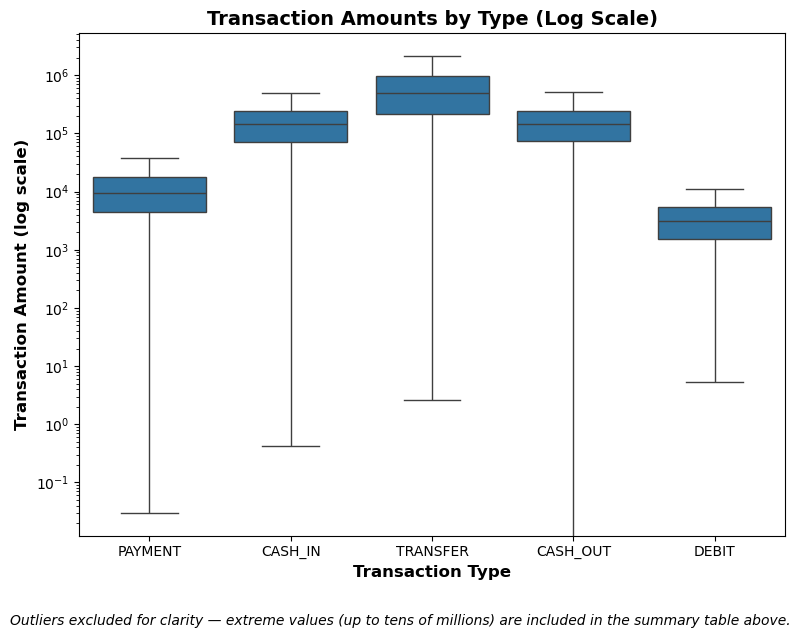

In [16]:
# Boxplot of transaction amounts by type
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=transactions,
    x='type',
    y='amount',
        showfliers=False  # hides extreme outliers so the boxes are easier to see
)

plt.yscale('log')  # log scale to handle skewed amounts
plt.title('Transaction Amounts by Type (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12, fontweight='bold')
plt.ylabel('Transaction Amount (log scale)', fontsize=12, fontweight='bold')

# Add extra space at the bottom so the caption fits
plt.subplots_adjust(bottom=0.2)

# Add caption below the plot
plt.figtext(
    0.5, -0.05,  # X is center, Y is below the plot area
    'Outliers excluded for clarity — extreme values (up to tens of millions) are included in the summary table above.',
    wrap=True,
    ha='center',
    fontsize=10,
    style='italic',
)

plt.tight_layout()
plt.show()


***Interpretation*** This boxplot shows the distribution of transaction amounts for each transaction type, using a log scale to account for extreme values.

- **`TRANSFER`** transactions have the highest typical amounts, with medians well above other types and a wide range extending toward the highest observed amounts.
- **`CASH_OUT` and `CASH_IN`** also involve relatively large amounts, with medians near 100,000 and broad spreads. Both categories show significant variability, indicated by the tall boxes and whiskers.
- **`PAYMENT` and `DEBIT`** transactions generally involve much smaller amounts, with medians in the thousands and less overall spread compared to transfers or cash movements.
- The log scale highlights that while all transaction types include very small and very large transactions, the **central tendency** (where most values cluster) is far higher for `TRANSFER` and cash-related transactions than for payments or debits.

Overall, `TRANSFER`, `CASH_IN`, and `CASH_OUT` consistently involve the largest transactions, while `PAYMENT` and `DEBIT` represent smaller and more routine movements of funds.


**Summary**

Transaction amounts vary significantly by type, with distributions that reflect distinct usage patterns:

- **TRANSFER** transactions have the highest typical amounts, with medians close to 488,000 and a long range of extreme values.  
- **CASH_IN** and **CASH_OUT** follow with similar medians (around 143,000–146,000), but CASH_OUT shows more variability.  
- **PAYMENT** and **DEBIT** transactions are much smaller, with medians below 10,000 and 3,100, aligning with everyday consumer or bill payments.

The summary statistics were **sorted by median amount** to emphasize where the bulk of activity lies, while the boxplot (with outliers excluded) focuses on the central distributions without being skewed by rare, extreme transfers.


**Answer**

Certain transaction types consistently involve larger amounts. **TRANSFER** transactions are the largest on average, followed by **CASH_IN** and **CASH_OUT**, which fall into a mid-range. **PAYMENT** and **DEBIT** transactions are far smaller and represent the bulk of low value activity. These patterns suggest that higher value monitoring and fraud detection efforts should prioritize **TRANSFER** and **CASH_OUT** types, where extreme amounts and variability are most common.


### Q4

In the previous section, transaction amounts were compared across different transaction types, showing that some categories, like `TRANSFER`, consistently involve much larger values than others, such as `PAYMENT` and `DEBIT`. While this helps identify where the largest transactions typically occur, it does not account for how fraud interacts with these patterns.

The focus now shifts to how transaction amounts vary when comparing **fraudulent and non-fraudulent transactions within each transaction type**. By breaking the dataset down by both fraud status and transaction type, it becomes possible to see whether fraudulent transactions tend to involve larger amounts, and if these patterns are consistent across categories. 

This comparison will use summary statistics and visualizations to highlight differences, helping to identify where fraud stands out most in terms of transaction size.

This analysis is done to answer the question:

    Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

**Fraud vs. Non-Fraud Transaction Amounts (Statistics Summary )**

In [17]:
# Group by transaction type and fraud status, calculate key stats for 'amount'
fraud_summary = transactions.groupby(['type', 'isFraud'])['amount'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).sort_values(by=['type', 'median'], ascending=[True, False])

# Display the summary table
fraud_summary

count          mean     median           std     min  \
type     isFraud                                                          
CASH_IN  0        219955  1.689289e+05  142942.99  1.267864e+05    0.43   
CASH_OUT 1           657  1.326971e+06  374178.28  2.244505e+06    0.00   
         0        350703  1.734277e+05  146085.00  1.310352e+05    1.74   
DEBIT    0          6417  5.445891e+03    3099.53  1.302416e+04    5.24   
PAYMENT  0        338573  1.305559e+04    9481.67  1.256291e+04    0.03   
TRANSFER 0         83055  9.081874e+05  488022.88  1.892640e+06    2.60   
         1           640  1.384176e+06  454774.80  2.262100e+06  164.00   

                          max  
type     isFraud               
CASH_IN  0         1609288.13  
CASH_OUT 1        10000000.00  
         0         2393198.44  
DEBIT    0          389762.68  
PAYMENT  0          230549.18  
TRANSFER 0        92445516.64  
         1        10000000.00

**Interpretation:** The table compares fraudulent and non-fraudulent transactions across each transaction type, showing their counts, mean, median, and range of amounts.

- **Fraudulent transactions are only present in `CASH_OUT` and `TRANSFER` types.**  
  These two types also handle the largest amounts overall, making them primary targets for fraud.
  
- **For `CASH_OUT` transactions:**  
  Fraud cases (657 transactions) have a **mean amount of about 1.33 million**, far higher than non-fraudulent ones (mean ~173,428).  
  However, their **median** (374,178) is lower than their mean, reflecting a few massive outliers pulling the average up.

- **For `TRANSFER` transactions:**  
  Fraud cases (640 transactions) show a **mean amount of ~1.38 million**, compared to ~908,187 for non-fraudulent ones.  
  The medians (454,775 vs. 488,023) are more similar, suggesting that while fraud does involve large amounts, the difference is less pronounced than in `CASH_OUT`.

- **`CASH_IN`, `PAYMENT`, and `DEBIT` transactions** show no fraud in this dataset, and their amounts are generally much smaller, with medians ranging from ~3,100 (`DEBIT`) to ~143,000 (`CASH_IN`).

Overall, fraudulent transactions tend to occur in **high-value categories** (`CASH_OUT` and `TRANSFER`) and often involve **larger average amounts** than their non-fraudulent counterparts, especially for cash-outs where the gap between fraud and non-fraud is most extreme.


While the summary table highlights how fraudulent and non-fraudulent transactions differ in size across each type, it can be difficult to see the contrasts at a glance. A grouped bar chart of **median transaction amounts** provides a clearer comparison, showing how typical amounts differ between fraud and non-fraud within each category. Because transaction amounts vary widely, a **log scale** is used on the y-axis so that differences remain visible without letting extreme values overwhelm the chart.


<Figure size 800x600 with 0 Axes>

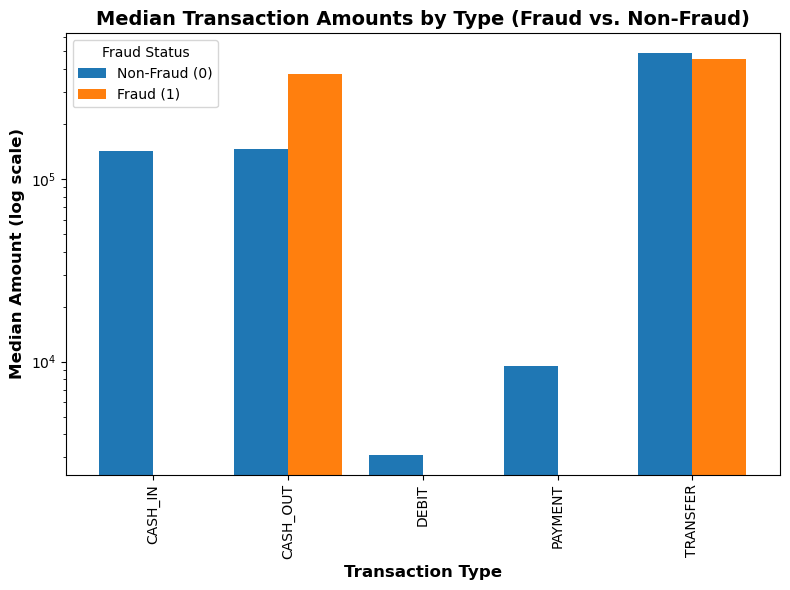

In [18]:
# Prepare the data for the grouped bar chart (median amounts)
median_amounts = transactions.groupby(['type', 'isFraud'])['amount'].median().unstack()

# Plot grouped bar chart
plt.figure(figsize=(8, 6))
median_amounts.plot(kind='bar', logy=True, figsize=(8, 6), width=0.8)

plt.title('Median Transaction Amounts by Type (Fraud vs. Non-Fraud)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12, fontweight='bold')
plt.ylabel('Median Amount (log scale)', fontsize=12, fontweight='bold')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'], title='Fraud Status')
plt.tight_layout()
plt.show()


**Interpretation:** This grouped bar chart compares **median transaction amounts** across transaction types, split by fraud status (orange for fraud, blue for non-fraud).  

There are several patterns:

- **Fraudulent transactions only occur in `TRANSFER` and `CASH_OUT` types**, and their medians are **much higher** than the non-fraudulent transactions in the same categories.  
- Non-fraudulent transactions dominate the other categories (`CASH_IN`, `PAYMENT`, and `DEBIT`), all of which involve **substantially smaller median amounts** compared to fraud heavy types.  
- The **logarithmic scale** reveals that median amounts for fraud cases in `CASH_OUT` and `TRANSFER` reach the upper end of the chart, highlighting how fraud tends to occur in **larger, high-value transfers** rather than in small or routine transactions.

These findings confirm that **transaction type and amount together form a strong indicator for fraud detection**, as fraud is concentrated in high value transfers and withdrawals rather than in everyday transactions.


**Answer**

Fraudulent transactions are concentrated in just two categories:`TRANSFER` and `CASH_OUT`. Both of which involve the largest transaction amounts overall. Within these types, fraud cases typically have **higher median amounts** than non-fraudulent transactions, with the gap most shown in `CASH_OUT`.  

The other transaction types (`CASH_IN`, `PAYMENT`, and `DEBIT`) have no fraud in this dataset and involve much smaller amounts, showing that fraud is mostly linked to big transfers and withdrawals, not everyday, smaller transactions.


## Q5

So far, the analysis has focused on how transaction amounts, types, and fraud status relate, revealing that fraud is concentrated in high value `TRANSFER` and `CASH_OUT` transactions. However, these findings only reflect the actual fraud cases in the dataset. The next step is to examine **how well the system itself detects this fraud**.

The dataset includes a built in fraud flag (`isFlaggedFraud`) that marks certain transactions as suspicious. To assess how effective this flag is, it is important to see how often flagged transactions actually match confirmed fraud (`isFraud`) and how many fraudulent transactions were **missed entirely** by the flag.

By organizing the data into a comparison of flagged vs. actual fraud, we can identify mismatches, evaluate the system’s accuracy, and highlight where its current detection approach may be failing.

This analyse is done to answer the question,

    Consider how well the system's built in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

To make this clear, we will start by organizing the results into a **confusion table** that breaks down the outcomes:

**Planned Output**

|                   | Actual Fraud (1) | Not Fraud (0) | Total             |
|-------------------|-------------------|---------------|-------------------|
| **Flagged (1)**   | True Positives (TP) | False Positives (FP) | Total Flagged     |
| **Not Flagged (0)** | False Negatives (FN) | True Negatives (TN) | Total Not Flagged |
| **Total**         | Total Fraud Cases | Total Non-Fraud | Grand Total        |

This table will show:  
- Where the fraud flag is correct (True Positives and True Negatives),  
- Where it misses fraud (False Negatives),  
- And whether it incorrectly flags non-fraud as fraud (False Positives).

From this, we’ll calculate three key metrics:  

- **Precision** = TP / (TP + FP): Of flagged transactions, how many were actually fraud?  
- **Recall (Sensitivity)** = TP / (TP + FN): Of all fraud cases, how many were caught?  
- **Accuracy** = (TP + TN) / Total: How often did the system make the correct call?  

These steps will help us understand how effective the current flagging system really is.

In [19]:
# Create a pivot table to summarize flagged vs actual fraud
pivot_table = transactions.pivot_table(
    index='isFlaggedFraud', 
    columns='isFraud', 
    values='amount',  # We just need a column to count
    aggfunc='count', 
    fill_value=0,
    margins=True,  # Adds row/column totals
    margins_name='Total'
)

# Rename rows and columns for readability
pivot_table.index = ['Not Flagged (0)', 'Flagged (1)', 'Total']
pivot_table.columns = ['Not Fraud (0)', 'Fraud (1)', 'Total']

pivot_table




,Not Fraud (0),Fraud (1),Total
Not Flagged (0),998703,1296,999999
Flagged (1),0,1,1
Total,998703,1297,1000000


**Interpretation:** The confusion table shows that there are **1,297 actual fraud cases** in the dataset, but only **1 transaction is flagged** by the system. 

This means:  
- **True Positive (TP): 1** — only one fraud case was flagged.  
- **False Negatives (FN): 1,296** — almost all fraud cases were missed.  
- **False Positives (FP): 0** — no legitimate transactions were incorrectly flagged.  
- **True Negatives (TN): 998,703** — nearly all non-fraud transactions were correctly left unflagged.

These counts set up our precision, recall, and accuracy calculations.


In [20]:
# Extract counts from the pivot table
TN = pivot_table.loc['Not Flagged (0)', 'Not Fraud (0)']  # True Negatives
FP = pivot_table.loc['Flagged (1)', 'Not Fraud (0)']      # False Positives
FN = pivot_table.loc['Not Flagged (0)', 'Fraud (1)']      # False Negatives
TP = pivot_table.loc['Flagged (1)', 'Fraud (1)']          # True Positives

# Total transactions
total = pivot_table.loc['Total', 'Total']

# Metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
accuracy = (TP + TN) / total

# Display results
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.6f}")
print(f"Accuracy: {accuracy:.6f}")


Precision: 1.000
Recall: 0.000771
Accuracy: 0.998704


**Interpretation:** Calculate **Precision, Recall, and Accuracy** to summarize the system’s performance. These metrics put the confusion table into perspective by showing the effectiveness of the flag numerically.

The results show:  
- **Precision: 1.0** — The single flagged transaction was indeed fraud, so there were no false alarms.  
- **Recall: 0.00077 (0.077%)** — Out of all 1,297 fraud cases, the system only flagged one. Nearly **100% of fraud goes undetected**.  
- **Accuracy: 99.87%** — The high accuracy is misleading because fraud is so rare in this dataset. The system looks “accurate” mainly by classifying almost everything as non-fraud, which fails to catch actual fraudulent behavior.

While the table shows exact counts, a **confusion matrix visualization** makes it easier to grasp how extreme the imbalance is between flagged fraud, missed fraud, and non-fraud.


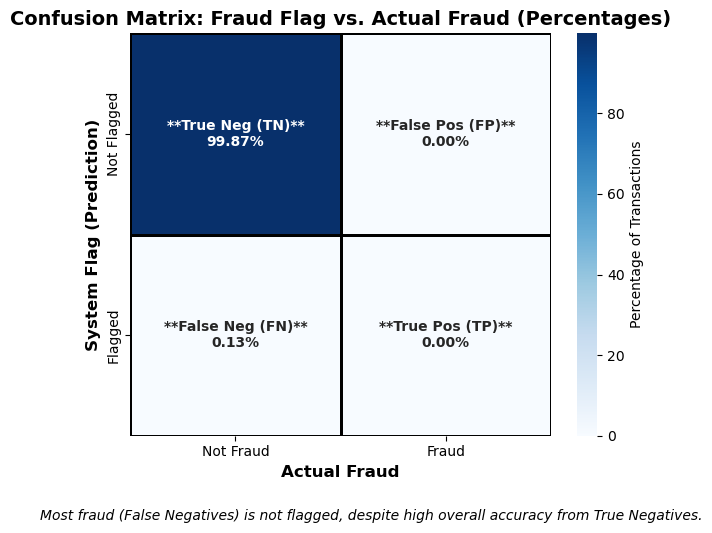

In [21]:
# Actual and predicted labels
y_true = transactions['isFraud']
y_pred = transactions['isFlaggedFraud']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_percent = (cm / cm.sum()) * 100

# Labels for cells with bold formatting
group_names = ['**True Neg (TN)**', '**False Pos (FP)**', '**False Neg (FN)**', '**True Pos (TP)**']
labels = [f'{name}\n{value:.2f}%' for name, value in zip(group_names, cm_percent.flatten())]
labels = np.asarray(labels).reshape(2, 2)

# Plot heatmap with thicker borders and colorbar
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percent,
    annot=labels,
    fmt='',
    cmap='Blues',
    linewidths=2,
    linecolor='black',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Flagged', 'Flagged'],
    cbar=True,
    cbar_kws={'label': 'Percentage of Transactions'},
    annot_kws={'fontweight': 'bold'}
)

plt.title('Confusion Matrix: Fraud Flag vs. Actual Fraud (Percentages)', fontsize=14, fontweight='bold')
plt.ylabel('System Flag (Prediction)', fontsize=12, fontweight='bold')
plt.xlabel('Actual Fraud', fontsize=12, fontweight='bold')
plt.tight_layout()

# Caption under the chart
plt.figtext(0.5, -0.05,
            'Most fraud (False Negatives) is not flagged, despite high overall accuracy from True Negatives.',
            ha='center', fontsize=10, style='italic')

plt.show()


**Interpretation:** The confusion matrix highlights that fraud cases are an extreme minority and nearly all are missed. The single true positive is visually overshadowed by the thousands of missed fraud cases and hundreds of thousands of true negatives.


Finally, to make the scale differences even clearer, we visualize fraud detection outcomes with a **stacked bar chart** using a log scale.


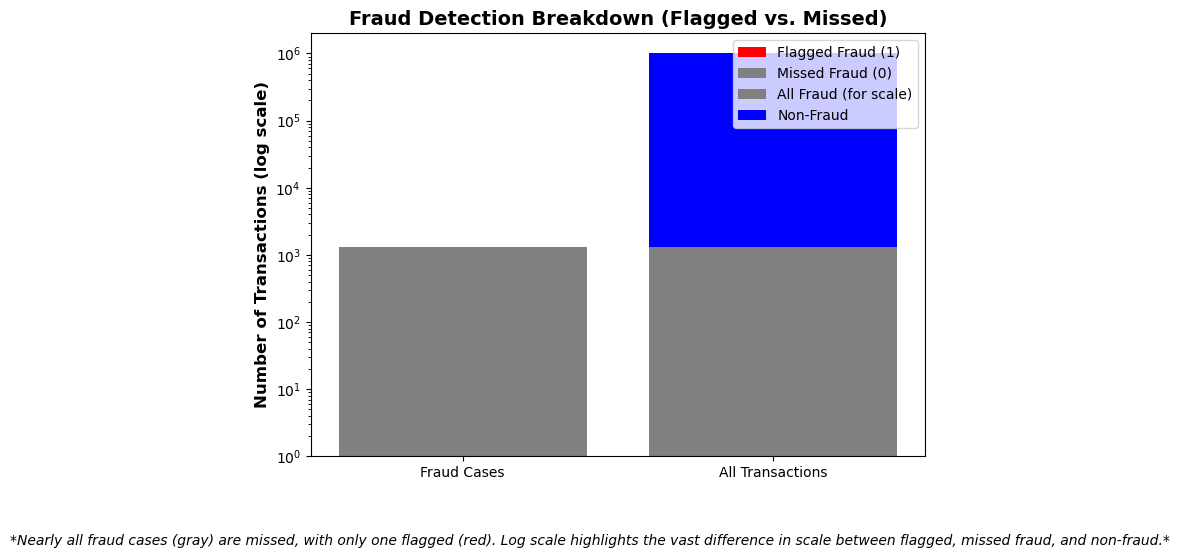

In [22]:
# Data breakdown
fraud_flagged = 1
fraud_missed = 1296
non_fraud = 998703

# Build stacked bar chart
plt.figure(figsize=(7, 5))

# Fraud cases (flagged vs missed)
plt.bar('Fraud Cases', fraud_flagged, color='red', label='Flagged Fraud (1)')
plt.bar('Fraud Cases', fraud_missed, bottom=fraud_flagged, color='gray', label='Missed Fraud (0)')

# Total transactions (fraud vs non-fraud)
plt.bar('All Transactions', fraud_flagged + fraud_missed, color='gray', label='All Fraud (for scale)')
plt.bar('All Transactions', non_fraud, bottom=fraud_flagged + fraud_missed, color='blue', label='Non-Fraud')

# Apply log scale so the tiny flagged case remains visible
plt.yscale('log')

# Titles and labels
plt.title('Fraud Detection Breakdown (Flagged vs. Missed)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Transactions (log scale)', fontsize=12, fontweight='bold')

# Legend
plt.legend(loc='upper right')

# Caption under the chart
plt.figtext(
    0.5, -0.1,
    '*Nearly all fraud cases (gray) are missed, with only one flagged (red). '
    'Log scale highlights the vast difference in scale between flagged, missed fraud, and non-fraud.*',
    ha='center', 
    fontsize=10, 
    style='italic'
)

plt.tight_layout()
plt.show()


**Interpretation:** This bar chart shows that **almost every fraud case is missed** (gray) with only a single flagged fraud (red). The log scale helps highlight how small the flagged fraud slice is compared to both missed fraud and the vast number of non-fraud transactions.


**Answer**

The built-in fraud flag performs extremely poorly. Out of **1,297 fraud cases**, only **one** is flagged, resulting in:  
- **Perfect precision (1.0)** because the single flagged case was truly fraud,  
- **Near-zero recall (0.00077)** because almost every fraud case is missed,  
- And **high but misleading accuracy (99.87%)** due to the overwhelming number of non-fraud cases.

This shows that the current fraud detection system is **ineffective for actually catching fraud** and cannot be relied upon. Almost all fraudulent transactions pass through unflagged, which would require a **redesign of the detection strategy** (new models, better rules, or additional features) to catch fraud more effectively.

### Key Finidngs 

1. **Numeric Features Show Heavy Skew and Outliers:**  
   Transaction amounts and account balances (`oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`) are heavily right skewed, with the majority of transactions falling in moderate ranges but extending up to extremely high values (near 100 million). Medians and interquartile ranges (IQR) are more reliable than means due to these outliers.

2. **Fraud is Concentrated in Specific Transaction Types:**  
   Fraudulent transactions occur only in `TRANSFER` and `CASH_OUT` types, and these involve the largest median transaction amounts compared to all other types.

3. **Fraudulent Transactions Display Distinct Patterns:**  
   When comparing balances and amounts, fraudulent activity tends to appear in **sparser, higher-value regions** and often deviates from typical balance update patterns seen in non-fraud transactions.

4. **Transaction Types Influence Typical Amounts:**  
   `TRANSFER` and `CASH_OUT` transactions involve far higher typical amounts than `CASH_IN`, `PAYMENT`, or `DEBIT`, highlighting key categories for focused fraud analysis.

5. **The Built-In Fraud Flag is Ineffective:**  
   The `isFlaggedFraud` indicator captures only **1 out of 1,297 fraud cases**, despite perfect precision, resulting in near-zero recall (0.08%). Most fraud cases pass unflagged, underscoring the need for a stronger detection method.

These findings will guide the **data transformation and modeling steps** in the next stages of the project, focusing on **handling skewness, class imbalance, and engineering features** that reflect the fraud patterns identified here.

The findings from this analysis will inform the **data preparation process** in `transform.ipynb`, where the dataset will be cleaned, transformed, and enhanced with engineered features to support modeling.

